### Cab-Driver Agent


Assignment Submitted By:
Mandheer Singh &
Kailash Mirani

In [1]:
# Importing libraries
import numpy as np
import random
import math
from collections import deque
import collections
import pickle
import time

# for building DQN model
from keras import layers
from keras import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

# for plotting graphs
import matplotlib.pyplot as plt

# Import the environment
from Env import CabDriver

#### Defining Time Matrix

In [2]:
# Loading the time matrix provided
Time_matrix = np.load("TM.npy")

### Agent Class

If you are using this framework, you need to fill the following to complete the following code block:
1. State and Action Size
2. Hyperparameters
3. Create a neural-network model in function 'build_model()'
4. Define epsilon-greedy strategy in function 'get_action()'
5. Complete the function 'append_sample()'. This function appends the recent experience tuple <state, action, reward, new-state> to the memory
6. Complete the 'train_model()' function with following logic:
   - If the memory size is greater than mini-batch size, you randomly sample experiences from memory as per the mini-batch size and do the following:
      - Initialise your input and output batch for training the model
      - Calculate the target Q value for each sample: reward + gamma*max(Q(s'a,))
      - Get Q(s', a) values from the last trained model
      - Update the input batch as your encoded state and output batch as your Q-values
      - Then fit your DQN model using the updated input and output batch.

In [3]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        # Define size of state and action
        self.state_size = state_size
        self.action_size = action_size

        # Write here: Specify you hyper parameters for the DQN
        self.discount_factor =0.9
        self.learning_rate =0.01        
        self.epsilon_max =1 
        self.epsilon_decay =-0.0009 
        self.epsilon_min = 0.00001
        
        self.batch_size = 32        
        # create replay memory using deque
        self.memory = deque(maxlen=2000)

        # create main model and target model
        self.model = self.build_model()
        
        #intialize the state which we want to track
        self.state_to_be_tracked=np.array(env.state_encod_arch1([1,2,2])).reshape(1,state_size)
        #list of q-values of state tracked
        self.state_tracked=[]

    # approximate Q function using Neural Network
    def build_model(self):
        model = Sequential()
        # Write your code here: Add layers to your neural nets 
        model.add(Dense(32,input_dim=self.state_size,activation='relu',kernel_initializer='he_uniform'))
        model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
        model.add(Dense(self.action_size,activation='relu'))
        
        model.compile(loss='mse',optimizer=Adam(lr=self.learning_rate))
        model.summary
        return model



    def get_action(self, state,time):
        # Write your code here:
        # get action from model using epsilon-greedy policy
        # Decay in ε after we generate each sample from the environment 
        epsilon = self.epsilon_min + (self.epsilon_max - self.epsilon_min) * np.exp(self.epsilon_decay*time)
        z=np.random.random()
        possible_actions_index,actions=env.requests(state)
        if z<=epsilon:
            #exploration
            
            return random.choice(possible_actions_index)
        else:
            #exploitation
            #reshaping state in the form (batch_size,state_size)
            resized_state=np.array(env.state_encod_arch1(state)).reshape(1,self.state_size)
            q_val=self.model.predict(resized_state) #model will give q-val for all actions with size(1,action_size)
            q_val_possible=[q_val[0][i] for i in possible_actions_index] #q-val for possible actions only
            index=np.argmax(np.array(q_val_possible))
            return possible_actions_index[index]
        
          
        
        
        
    def append_sample(self, state, action, reward, next_state,terminal):
        # Write your code here:
        # save sample <s,a,r,s'> to the replay memory
        self.memory.append((state,action,reward,next_state,terminal))
        
    
    
    
    # pick samples randomly from replay memory (with batch_size) and train the network
    def train_model(self):
        
        if len(self.memory) > self.batch_size:
            # Sample batch from the memory
            mini_batch = random.sample(self.memory, self.batch_size)
            update_output = np.zeros((self.batch_size,self.state_size)) # intializing next state vector
            update_input =np.zeros((self.batch_size,self.state_size)) # intializing  current state vector
            
            actions, rewards,terminals = [], [],[]
            
            for i in range(self.batch_size):
                state, action, reward, next_state,terminal = mini_batch[i]
                update_input[i]=env.state_encod_arch1(state)
                update_output[i]=env.state_encod_arch1(next_state)
                actions.append(action)
                rewards.append(reward)
                terminals.append(terminal)
            #predicting target values for current state from model and we will update the actions as per the replay
            #buffer
            target=self.model.predict(update_input)
            #predicting the value for next state to fetch future reward
            target_q=self.model.predict(update_output)
            
            for i in range(self.batch_size):
                if terminals[i]:
                    target[i][actions[i]] =rewards[i]
                else:
                    target[i][actions[i]] =rewards[i] + (self.discount_factor * np.max(target_q[i]))
                    #print(target[i][actions[i]])
                    #print(action_space.index(actions[i]))
            self.model.fit(update_input,target,batch_size=self.batch_size,epochs=1,verbose=0)
                    
                
                
                # Write your code from here
                # 1. Predict the target from earlier model
                
                
                # 2. Get the target for the Q-network
                
                
                #3. Update your 'update_output' and 'update_input' batch

                
                
        # 4. Fit your model and track the loss values
    def save_tracking_state(self):
        #find q value of state action pair we are tracking and store it in the list state tracked
        q_val=self.model.predict(self.state_to_be_tracked)
        self.state_tracked.append(q_val[0][6]) #action we want to track is 6


    def save(self):
        self.model.save("model.h5")

In [4]:
Episodes =15000
m=5
t=24
d=7
episode_len=24*30

### DQN block

In [5]:
env=CabDriver()
action_space,state_space,state=env.reset()
state_size=m+t+d
action_size=len(action_space)
agent=DQNAgent(action_size=action_size,state_size=state_size)
rewards_per_episode,episodes=[],[]

start_time=time.time()


for episode in range(Episodes):
    terminal=False

    # Write code here
    # Call the environment
    env=CabDriver()
    action_space,state_space,state=env.reset()
    
    
    # Call all the initialised variables of the environment
    

    #Call the DQN agent
    score=0.0
    total_time=0  #intializing episode time
    while not terminal:
        
        # Write your code here
        # 1. Pick epsilon-greedy action from possible actions for the current state
        action_index=agent.get_action(state,episode)
        action=env.action_space[action_index]
        
        # 2. Evaluate your reward and next state
        reward=env.reward_func(state,action,Time_matrix)
        next_state=env.next_state_func(state,action,Time_matrix)
        #checking if terminal of episode is reached
        if state[2]==next_state[2]:
            curr_time=next_state[1]-state[1]
        else:
            curr_time=24-state[1]+next_state[1]
        total_time+=curr_time
        if total_time>episode_len:
            terminal=True
        
        # 3. Append the experience to the memory
        agent.append_sample(state,action_index,reward,next_state,terminal)
        # 4. Train the model by calling function agent.train_model
        agent.train_model()
            
            # 5. Keep a track of rewards, Q-values, loss
        score+=reward
        state=next_state
        
    rewards_per_episode.append(score)
    episodes.append(episode)
    
    #printing rewards after every 10 episodes
    if(((episode+1)%5)==0):
        print("episode {0}, average monthly reward {1}".format(episode+1,np.mean(score)))
        
    if(((episode+1)%5)==0):
        agent.save_tracking_state()
        
    if(((episode+1)%5)==0):
        print("Saving Model {}".format(episode+1))
        agent.save()
        
    

print('elapsed_time {0}'.format(time.time()-start_time))
            
        
        
        
        

episode 5, average monthly reward -355.0
Saving Model 5
episode 10, average monthly reward -221.0
Saving Model 10
episode 15, average monthly reward -70.0
Saving Model 15
episode 20, average monthly reward -343.0
Saving Model 20
episode 25, average monthly reward -273.0
Saving Model 25
episode 30, average monthly reward -246.0
Saving Model 30
episode 35, average monthly reward -101.0
Saving Model 35
episode 40, average monthly reward -355.0
Saving Model 40
episode 45, average monthly reward -286.0
Saving Model 45
episode 50, average monthly reward -311.0
Saving Model 50
episode 55, average monthly reward -309.0
Saving Model 55
episode 60, average monthly reward -191.0
Saving Model 60
episode 65, average monthly reward -203.0
Saving Model 65
episode 70, average monthly reward -199.0
Saving Model 70
episode 75, average monthly reward 179.0
Saving Model 75
episode 80, average monthly reward -129.0
Saving Model 80
episode 85, average monthly reward 16.0
Saving Model 85
episode 90, average 

episode 705, average monthly reward 755.0
Saving Model 705
episode 710, average monthly reward 334.0
Saving Model 710
episode 715, average monthly reward 397.0
Saving Model 715
episode 720, average monthly reward 536.0
Saving Model 720
episode 725, average monthly reward 587.0
Saving Model 725
episode 730, average monthly reward 417.0
Saving Model 730
episode 735, average monthly reward 364.0
Saving Model 735
episode 740, average monthly reward 457.0
Saving Model 740
episode 745, average monthly reward 476.0
Saving Model 745
episode 750, average monthly reward 347.0
Saving Model 750
episode 755, average monthly reward 616.0
Saving Model 755
episode 760, average monthly reward 541.0
Saving Model 760
episode 765, average monthly reward 741.0
Saving Model 765
episode 770, average monthly reward 764.0
Saving Model 770
episode 775, average monthly reward 543.0
Saving Model 775
episode 780, average monthly reward 684.0
Saving Model 780
episode 785, average monthly reward 407.0
Saving Model 7

episode 1390, average monthly reward 777.0
Saving Model 1390
episode 1395, average monthly reward 1088.0
Saving Model 1395
episode 1400, average monthly reward 526.0
Saving Model 1400
episode 1405, average monthly reward 876.0
Saving Model 1405
episode 1410, average monthly reward 859.0
Saving Model 1410
episode 1415, average monthly reward 634.0
Saving Model 1415
episode 1420, average monthly reward 865.0
Saving Model 1420
episode 1425, average monthly reward 976.0
Saving Model 1425
episode 1430, average monthly reward 544.0
Saving Model 1430
episode 1435, average monthly reward 1144.0
Saving Model 1435
episode 1440, average monthly reward 881.0
Saving Model 1440
episode 1445, average monthly reward 1056.0
Saving Model 1445
episode 1450, average monthly reward 519.0
Saving Model 1450
episode 1455, average monthly reward 426.0
Saving Model 1455
episode 1460, average monthly reward 623.0
Saving Model 1460
episode 1465, average monthly reward 802.0
Saving Model 1465
episode 1470, average

episode 2060, average monthly reward 1034.0
Saving Model 2060
episode 2065, average monthly reward 1086.0
Saving Model 2065
episode 2070, average monthly reward 1378.0
Saving Model 2070
episode 2075, average monthly reward 748.0
Saving Model 2075
episode 2080, average monthly reward 1014.0
Saving Model 2080
episode 2085, average monthly reward 1224.0
Saving Model 2085
episode 2090, average monthly reward 1147.0
Saving Model 2090
episode 2095, average monthly reward 1021.0
Saving Model 2095
episode 2100, average monthly reward 1156.0
Saving Model 2100
episode 2105, average monthly reward 1030.0
Saving Model 2105
episode 2110, average monthly reward 1185.0
Saving Model 2110
episode 2115, average monthly reward 1196.0
Saving Model 2115
episode 2120, average monthly reward 1390.0
Saving Model 2120
episode 2125, average monthly reward 1237.0
Saving Model 2125
episode 2130, average monthly reward 762.0
Saving Model 2130
episode 2135, average monthly reward 1022.0
Saving Model 2135
episode 21

episode 2725, average monthly reward 1196.0
Saving Model 2725
episode 2730, average monthly reward 1524.0
Saving Model 2730
episode 2735, average monthly reward 1315.0
Saving Model 2735
episode 2740, average monthly reward 1031.0
Saving Model 2740
episode 2745, average monthly reward 1545.0
Saving Model 2745
episode 2750, average monthly reward 1337.0
Saving Model 2750
episode 2755, average monthly reward 1367.0
Saving Model 2755
episode 2760, average monthly reward 1480.0
Saving Model 2760
episode 2765, average monthly reward 1439.0
Saving Model 2765
episode 2770, average monthly reward 1573.0
Saving Model 2770
episode 2775, average monthly reward 1162.0
Saving Model 2775
episode 2780, average monthly reward 1171.0
Saving Model 2780
episode 2785, average monthly reward 949.0
Saving Model 2785
episode 2790, average monthly reward 977.0
Saving Model 2790
episode 2795, average monthly reward 1286.0
Saving Model 2795
episode 2800, average monthly reward 1304.0
Saving Model 2800
episode 28

episode 3390, average monthly reward 1486.0
Saving Model 3390
episode 3395, average monthly reward 1495.0
Saving Model 3395
episode 3400, average monthly reward 1412.0
Saving Model 3400
episode 3405, average monthly reward 1272.0
Saving Model 3405
episode 3410, average monthly reward 1568.0
Saving Model 3410
episode 3415, average monthly reward 1617.0
Saving Model 3415
episode 3420, average monthly reward 1759.0
Saving Model 3420
episode 3425, average monthly reward 1672.0
Saving Model 3425
episode 3430, average monthly reward 1532.0
Saving Model 3430
episode 3435, average monthly reward 1559.0
Saving Model 3435
episode 3440, average monthly reward 1199.0
Saving Model 3440
episode 3445, average monthly reward 1651.0
Saving Model 3445
episode 3450, average monthly reward 1021.0
Saving Model 3450
episode 3455, average monthly reward 1506.0
Saving Model 3455
episode 3460, average monthly reward 1415.0
Saving Model 3460
episode 3465, average monthly reward 1205.0
Saving Model 3465
episode 

episode 4055, average monthly reward 1507.0
Saving Model 4055
episode 4060, average monthly reward 1708.0
Saving Model 4060
episode 4065, average monthly reward 1312.0
Saving Model 4065
episode 4070, average monthly reward 1716.0
Saving Model 4070
episode 4075, average monthly reward 1511.0
Saving Model 4075
episode 4080, average monthly reward 1235.0
Saving Model 4080
episode 4085, average monthly reward 1672.0
Saving Model 4085
episode 4090, average monthly reward 1501.0
Saving Model 4090
episode 4095, average monthly reward 1471.0
Saving Model 4095
episode 4100, average monthly reward 1750.0
Saving Model 4100
episode 4105, average monthly reward 1421.0
Saving Model 4105
episode 4110, average monthly reward 1666.0
Saving Model 4110
episode 4115, average monthly reward 1584.0
Saving Model 4115
episode 4120, average monthly reward 1457.0
Saving Model 4120
episode 4125, average monthly reward 1259.0
Saving Model 4125
episode 4130, average monthly reward 1208.0
Saving Model 4130
episode 

episode 4720, average monthly reward 1361.0
Saving Model 4720
episode 4725, average monthly reward 1382.0
Saving Model 4725
episode 4730, average monthly reward 1393.0
Saving Model 4730
episode 4735, average monthly reward 1345.0
Saving Model 4735
episode 4740, average monthly reward 1172.0
Saving Model 4740
episode 4745, average monthly reward 1456.0
Saving Model 4745
episode 4750, average monthly reward 1777.0
Saving Model 4750
episode 4755, average monthly reward 1739.0
Saving Model 4755
episode 4760, average monthly reward 1326.0
Saving Model 4760
episode 4765, average monthly reward 1663.0
Saving Model 4765
episode 4770, average monthly reward 1523.0
Saving Model 4770
episode 4775, average monthly reward 1268.0
Saving Model 4775
episode 4780, average monthly reward 1322.0
Saving Model 4780
episode 4785, average monthly reward 1466.0
Saving Model 4785
episode 4790, average monthly reward 1273.0
Saving Model 4790
episode 4795, average monthly reward 1430.0
Saving Model 4795
episode 

episode 5385, average monthly reward 1498.0
Saving Model 5385
episode 5390, average monthly reward 1806.0
Saving Model 5390
episode 5395, average monthly reward 1826.0
Saving Model 5395
episode 5400, average monthly reward 1439.0
Saving Model 5400
episode 5405, average monthly reward 1295.0
Saving Model 5405
episode 5410, average monthly reward 1568.0
Saving Model 5410
episode 5415, average monthly reward 1793.0
Saving Model 5415
episode 5420, average monthly reward 1331.0
Saving Model 5420
episode 5425, average monthly reward 1469.0
Saving Model 5425
episode 5430, average monthly reward 1583.0
Saving Model 5430
episode 5435, average monthly reward 1375.0
Saving Model 5435
episode 5440, average monthly reward 1812.0
Saving Model 5440
episode 5445, average monthly reward 1300.0
Saving Model 5445
episode 5450, average monthly reward 1232.0
Saving Model 5450
episode 5455, average monthly reward 1524.0
Saving Model 5455
episode 5460, average monthly reward 1746.0
Saving Model 5460
episode 

episode 6050, average monthly reward 1418.0
Saving Model 6050
episode 6055, average monthly reward 1677.0
Saving Model 6055
episode 6060, average monthly reward 1390.0
Saving Model 6060
episode 6065, average monthly reward 1780.0
Saving Model 6065
episode 6070, average monthly reward 1534.0
Saving Model 6070
episode 6075, average monthly reward 1306.0
Saving Model 6075
episode 6080, average monthly reward 1462.0
Saving Model 6080
episode 6085, average monthly reward 1691.0
Saving Model 6085
episode 6090, average monthly reward 1829.0
Saving Model 6090
episode 6095, average monthly reward 1523.0
Saving Model 6095
episode 6100, average monthly reward 1269.0
Saving Model 6100
episode 6105, average monthly reward 1880.0
Saving Model 6105
episode 6110, average monthly reward 1681.0
Saving Model 6110
episode 6115, average monthly reward 1627.0
Saving Model 6115
episode 6120, average monthly reward 1380.0
Saving Model 6120
episode 6125, average monthly reward 1570.0
Saving Model 6125
episode 

episode 6715, average monthly reward 1525.0
Saving Model 6715
episode 6720, average monthly reward 1293.0
Saving Model 6720
episode 6725, average monthly reward 1678.0
Saving Model 6725
episode 6730, average monthly reward 1205.0
Saving Model 6730
episode 6735, average monthly reward 1631.0
Saving Model 6735
episode 6740, average monthly reward 1896.0
Saving Model 6740
episode 6745, average monthly reward 1997.0
Saving Model 6745
episode 6750, average monthly reward 1811.0
Saving Model 6750
episode 6755, average monthly reward 2136.0
Saving Model 6755
episode 6760, average monthly reward 2000.0
Saving Model 6760
episode 6765, average monthly reward 1649.0
Saving Model 6765
episode 6770, average monthly reward 1662.0
Saving Model 6770
episode 6775, average monthly reward 1561.0
Saving Model 6775
episode 6780, average monthly reward 1766.0
Saving Model 6780
episode 6785, average monthly reward 1825.0
Saving Model 6785
episode 6790, average monthly reward 1596.0
Saving Model 6790
episode 

episode 7380, average monthly reward 1358.0
Saving Model 7380
episode 7385, average monthly reward 1700.0
Saving Model 7385
episode 7390, average monthly reward 1889.0
Saving Model 7390
episode 7395, average monthly reward 1599.0
Saving Model 7395
episode 7400, average monthly reward 2073.0
Saving Model 7400
episode 7405, average monthly reward 1546.0
Saving Model 7405
episode 7410, average monthly reward 1677.0
Saving Model 7410
episode 7415, average monthly reward 1726.0
Saving Model 7415
episode 7420, average monthly reward 1669.0
Saving Model 7420
episode 7425, average monthly reward 1776.0
Saving Model 7425
episode 7430, average monthly reward 1712.0
Saving Model 7430
episode 7435, average monthly reward 1850.0
Saving Model 7435
episode 7440, average monthly reward 1430.0
Saving Model 7440
episode 7445, average monthly reward 1682.0
Saving Model 7445
episode 7450, average monthly reward 1842.0
Saving Model 7450
episode 7455, average monthly reward 1625.0
Saving Model 7455
episode 

episode 8045, average monthly reward 1810.0
Saving Model 8045
episode 8050, average monthly reward 1502.0
Saving Model 8050
episode 8055, average monthly reward 1782.0
Saving Model 8055
episode 8060, average monthly reward 1676.0
Saving Model 8060
episode 8065, average monthly reward 1627.0
Saving Model 8065
episode 8070, average monthly reward 1605.0
Saving Model 8070
episode 8075, average monthly reward 1859.0
Saving Model 8075
episode 8080, average monthly reward 1216.0
Saving Model 8080
episode 8085, average monthly reward 1450.0
Saving Model 8085
episode 8090, average monthly reward 1858.0
Saving Model 8090
episode 8095, average monthly reward 1489.0
Saving Model 8095
episode 8100, average monthly reward 1817.0
Saving Model 8100
episode 8105, average monthly reward 1384.0
Saving Model 8105
episode 8110, average monthly reward 1570.0
Saving Model 8110
episode 8115, average monthly reward 1496.0
Saving Model 8115
episode 8120, average monthly reward 1349.0
Saving Model 8120
episode 

episode 8710, average monthly reward 1609.0
Saving Model 8710
episode 8715, average monthly reward 1809.0
Saving Model 8715
episode 8720, average monthly reward 1390.0
Saving Model 8720
episode 8725, average monthly reward 1571.0
Saving Model 8725
episode 8730, average monthly reward 1709.0
Saving Model 8730
episode 8735, average monthly reward 1507.0
Saving Model 8735
episode 8740, average monthly reward 1457.0
Saving Model 8740
episode 8745, average monthly reward 1943.0
Saving Model 8745
episode 8750, average monthly reward 1528.0
Saving Model 8750
episode 8755, average monthly reward 1676.0
Saving Model 8755
episode 8760, average monthly reward 1754.0
Saving Model 8760
episode 8765, average monthly reward 1567.0
Saving Model 8765
episode 8770, average monthly reward 1645.0
Saving Model 8770
episode 8775, average monthly reward 1668.0
Saving Model 8775
episode 8780, average monthly reward 1524.0
Saving Model 8780
episode 8785, average monthly reward 1546.0
Saving Model 8785
episode 

episode 9375, average monthly reward 1790.0
Saving Model 9375
episode 9380, average monthly reward 1606.0
Saving Model 9380
episode 9385, average monthly reward 1645.0
Saving Model 9385
episode 9390, average monthly reward 1230.0
Saving Model 9390
episode 9395, average monthly reward 1730.0
Saving Model 9395
episode 9400, average monthly reward 1515.0
Saving Model 9400
episode 9405, average monthly reward 1718.0
Saving Model 9405
episode 9410, average monthly reward 1627.0
Saving Model 9410
episode 9415, average monthly reward 1617.0
Saving Model 9415
episode 9420, average monthly reward 1741.0
Saving Model 9420
episode 9425, average monthly reward 1437.0
Saving Model 9425
episode 9430, average monthly reward 1587.0
Saving Model 9430
episode 9435, average monthly reward 1705.0
Saving Model 9435
episode 9440, average monthly reward 1884.0
Saving Model 9440
episode 9445, average monthly reward 1318.0
Saving Model 9445
episode 9450, average monthly reward 1409.0
Saving Model 9450
episode 

episode 10035, average monthly reward 1569.0
Saving Model 10035
episode 10040, average monthly reward 1562.0
Saving Model 10040
episode 10045, average monthly reward 1633.0
Saving Model 10045
episode 10050, average monthly reward 1528.0
Saving Model 10050
episode 10055, average monthly reward 1723.0
Saving Model 10055
episode 10060, average monthly reward 1641.0
Saving Model 10060
episode 10065, average monthly reward 1709.0
Saving Model 10065
episode 10070, average monthly reward 1714.0
Saving Model 10070
episode 10075, average monthly reward 1860.0
Saving Model 10075
episode 10080, average monthly reward 1669.0
Saving Model 10080
episode 10085, average monthly reward 1695.0
Saving Model 10085
episode 10090, average monthly reward 1761.0
Saving Model 10090
episode 10095, average monthly reward 1871.0
Saving Model 10095
episode 10100, average monthly reward 1474.0
Saving Model 10100
episode 10105, average monthly reward 1649.0
Saving Model 10105
episode 10110, average monthly reward 17

episode 10680, average monthly reward 1699.0
Saving Model 10680
episode 10685, average monthly reward 1415.0
Saving Model 10685
episode 10690, average monthly reward 1476.0
Saving Model 10690
episode 10695, average monthly reward 1771.0
Saving Model 10695
episode 10700, average monthly reward 1660.0
Saving Model 10700
episode 10705, average monthly reward 1893.0
Saving Model 10705
episode 10710, average monthly reward 1787.0
Saving Model 10710
episode 10715, average monthly reward 1568.0
Saving Model 10715
episode 10720, average monthly reward 1615.0
Saving Model 10720
episode 10725, average monthly reward 1987.0
Saving Model 10725
episode 10730, average monthly reward 1948.0
Saving Model 10730
episode 10735, average monthly reward 1471.0
Saving Model 10735
episode 10740, average monthly reward 1480.0
Saving Model 10740
episode 10745, average monthly reward 1405.0
Saving Model 10745
episode 10750, average monthly reward 1502.0
Saving Model 10750
episode 10755, average monthly reward 14

episode 11325, average monthly reward 1583.0
Saving Model 11325
episode 11330, average monthly reward 1348.0
Saving Model 11330
episode 11335, average monthly reward 1551.0
Saving Model 11335
episode 11340, average monthly reward 1546.0
Saving Model 11340
episode 11345, average monthly reward 1448.0
Saving Model 11345
episode 11350, average monthly reward 1817.0
Saving Model 11350
episode 11355, average monthly reward 1443.0
Saving Model 11355
episode 11360, average monthly reward 1538.0
Saving Model 11360
episode 11365, average monthly reward 1405.0
Saving Model 11365
episode 11370, average monthly reward 1633.0
Saving Model 11370
episode 11375, average monthly reward 1618.0
Saving Model 11375
episode 11380, average monthly reward 1388.0
Saving Model 11380
episode 11385, average monthly reward 1371.0
Saving Model 11385
episode 11390, average monthly reward 1609.0
Saving Model 11390
episode 11395, average monthly reward 1308.0
Saving Model 11395
episode 11400, average monthly reward 14

episode 11970, average monthly reward 1345.0
Saving Model 11970
episode 11975, average monthly reward 1646.0
Saving Model 11975
episode 11980, average monthly reward 1541.0
Saving Model 11980
episode 11985, average monthly reward 1610.0
Saving Model 11985
episode 11990, average monthly reward 1552.0
Saving Model 11990
episode 11995, average monthly reward 1770.0
Saving Model 11995
episode 12000, average monthly reward 1520.0
Saving Model 12000
episode 12005, average monthly reward 1861.0
Saving Model 12005
episode 12010, average monthly reward 1786.0
Saving Model 12010
episode 12015, average monthly reward 1553.0
Saving Model 12015
episode 12020, average monthly reward 1358.0
Saving Model 12020
episode 12025, average monthly reward 1708.0
Saving Model 12025
episode 12030, average monthly reward 1698.0
Saving Model 12030
episode 12035, average monthly reward 1551.0
Saving Model 12035
episode 12040, average monthly reward 1254.0
Saving Model 12040
episode 12045, average monthly reward 14

episode 12615, average monthly reward 1809.0
Saving Model 12615
episode 12620, average monthly reward 1895.0
Saving Model 12620
episode 12625, average monthly reward 1587.0
Saving Model 12625
episode 12630, average monthly reward 1755.0
Saving Model 12630
episode 12635, average monthly reward 1828.0
Saving Model 12635
episode 12640, average monthly reward 1305.0
Saving Model 12640
episode 12645, average monthly reward 1447.0
Saving Model 12645
episode 12650, average monthly reward 1453.0
Saving Model 12650
episode 12655, average monthly reward 1659.0
Saving Model 12655
episode 12660, average monthly reward 1526.0
Saving Model 12660
episode 12665, average monthly reward 1712.0
Saving Model 12665
episode 12670, average monthly reward 1435.0
Saving Model 12670
episode 12675, average monthly reward 1727.0
Saving Model 12675
episode 12680, average monthly reward 1640.0
Saving Model 12680
episode 12685, average monthly reward 1525.0
Saving Model 12685
episode 12690, average monthly reward 15

episode 13260, average monthly reward 1534.0
Saving Model 13260
episode 13265, average monthly reward 1502.0
Saving Model 13265
episode 13270, average monthly reward 1321.0
Saving Model 13270
episode 13275, average monthly reward 1531.0
Saving Model 13275
episode 13280, average monthly reward 1696.0
Saving Model 13280
episode 13285, average monthly reward 1497.0
Saving Model 13285
episode 13290, average monthly reward 1651.0
Saving Model 13290
episode 13295, average monthly reward 1614.0
Saving Model 13295
episode 13300, average monthly reward 1704.0
Saving Model 13300
episode 13305, average monthly reward 1214.0
Saving Model 13305
episode 13310, average monthly reward 1502.0
Saving Model 13310
episode 13315, average monthly reward 1340.0
Saving Model 13315
episode 13320, average monthly reward 1669.0
Saving Model 13320
episode 13325, average monthly reward 1426.0
Saving Model 13325
episode 13330, average monthly reward 1779.0
Saving Model 13330
episode 13335, average monthly reward 17

episode 13905, average monthly reward 1312.0
Saving Model 13905
episode 13910, average monthly reward 1466.0
Saving Model 13910
episode 13915, average monthly reward 1709.0
Saving Model 13915
episode 13920, average monthly reward 1471.0
Saving Model 13920
episode 13925, average monthly reward 1858.0
Saving Model 13925
episode 13930, average monthly reward 1598.0
Saving Model 13930
episode 13935, average monthly reward 1632.0
Saving Model 13935
episode 13940, average monthly reward 1290.0
Saving Model 13940
episode 13945, average monthly reward 1997.0
Saving Model 13945
episode 13950, average monthly reward 1592.0
Saving Model 13950
episode 13955, average monthly reward 1475.0
Saving Model 13955
episode 13960, average monthly reward 1772.0
Saving Model 13960
episode 13965, average monthly reward 1610.0
Saving Model 13965
episode 13970, average monthly reward 1687.0
Saving Model 13970
episode 13975, average monthly reward 1731.0
Saving Model 13975
episode 13980, average monthly reward 16

episode 14550, average monthly reward 1478.0
Saving Model 14550
episode 14555, average monthly reward 1658.0
Saving Model 14555
episode 14560, average monthly reward 1808.0
Saving Model 14560
episode 14565, average monthly reward 1454.0
Saving Model 14565
episode 14570, average monthly reward 1449.0
Saving Model 14570
episode 14575, average monthly reward 1668.0
Saving Model 14575
episode 14580, average monthly reward 1772.0
Saving Model 14580
episode 14585, average monthly reward 1642.0
Saving Model 14585
episode 14590, average monthly reward 1700.0
Saving Model 14590
episode 14595, average monthly reward 1833.0
Saving Model 14595
episode 14600, average monthly reward 1639.0
Saving Model 14600
episode 14605, average monthly reward 1565.0
Saving Model 14605
episode 14610, average monthly reward 1164.0
Saving Model 14610
episode 14615, average monthly reward 1511.0
Saving Model 14615
episode 14620, average monthly reward 1641.0
Saving Model 14620
episode 14625, average monthly reward 16

### Tracking Convergence

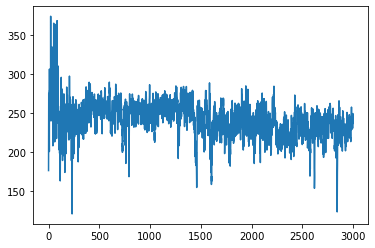

In [6]:
plt.plot(agent.state_tracked)

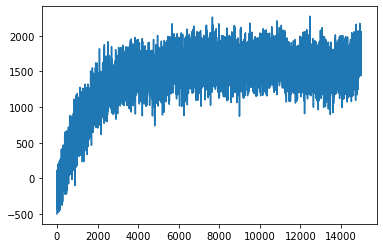

In [9]:
plt.plot(rewards_per_episode)

#### Epsilon-decay sample function

<div class="alert alert-block alert-info">
Try building a similar epsilon-decay function for your model.
</div>

In [7]:
time = np.arange(0,10000)
epsilon = []
for i in range(0,10000):
    epsilon.append(0 + (1 - 0) * np.exp(-0.0009*i))

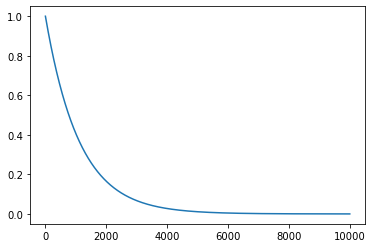

In [8]:
plt.plot(time, epsilon)
plt.show()